In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import geopandas as gpd

In [3]:
budget = pd.read_csv('WHO country data/WHO_TB_budget_2024-11-18.csv')
laboratories = pd.read_csv('WHO country data/WHO_TB_laboratories_2024-11-18.csv')
expenditure = pd.read_csv('WHO country data/WHO_TB_expenditure_utilisation_2024-11-18.csv')
notification = pd.read_csv('WHO country data/WHO_TB_notifications_2024-11-19.csv')

### Budget data

Budget Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          1505 non-null   object 
 1   iso2             1498 non-null   object 
 2   iso3             1505 non-null   object 
 3   iso_numeric      1505 non-null   int64  
 4   g_whoregion      1505 non-null   object 
 5   year             1505 non-null   int64  
 6   tx_dstb          782 non-null    float64
 7   budget_cpp_dstb  746 non-null    float64
 8   tx_mdr           779 non-null    float64
 9   budget_cpp_mdr   742 non-null    float64
 10  tx_xdr           701 non-null    float64
 11  budget_cpp_xdr   638 non-null    float64
 12  tx_tpt           524 non-null    float64
 13  budget_cpp_tpt   498 non-null    float64
 14  budget_lab       724 non-null    float64
 15  cf_lab           722 non-null    float64
 16  budget_staff     715 non-null    float6

,country,iso2,iso3,iso_numeric,g_whoregion,year,tx_dstb,budget_cpp_dstb,tx_mdr,budget_cpp_mdr,...,cf_orsrvy,budget_oth,cf_oth,budget_tot,cf_tot,cf_tot_domestic,cf_tot_gf,cf_tot_usaid,cf_tot_grnt,cf_tot_sources
0,Afghanistan,AF,AFG,4,EMR,2018,52000.0,40.0,450.0,1400.0,...,344940.0,NaN,2912498.0,10881354.0,10698483.0,533779.0,3178499.0,4462530.0,2523675.0,10698483.0
1,Afghanistan,AF,AFG,4,EMR,2019,53000.0,50.0,585.0,1500.0,...,59000.0,5344361.0,5171641.0,16957452.0,13419792.0,511854.0,6533095.0,2766449.0,3608394.0,13419792.0
2,Afghanistan,AF,AFG,4,EMR,2020,57000.0,40.0,580.0,1000.0,...,400000.0,4000000.0,3600775.0,19137128.0,17978424.0,1171864.0,6935551.0,3000000.0,6871009.0,17978424.0
3,Afghanistan,AF,AFG,4,EMR,2021,53825.0,50.0,725.0,1000.0,...,127420.0,3606831.0,3606831.0,10633599.0,10633599.0,NaN,7638546.0,NaN,2995053.0,10633599.0
4,Afghanistan,AF,AFG,4,EMR,2022,56795.0,50.0,600.0,1000.0,...,67310.0,3529753.0,3529753.0,14141821.0,10599950.0,269339.0,6876137.0,1555946.0,1898528.0,10599950.0



Basic statistics:


,iso_numeric,year,tx_dstb,budget_cpp_dstb,tx_mdr,budget_cpp_mdr,tx_xdr,budget_cpp_xdr,tx_tpt,budget_cpp_tpt,...,cf_orsrvy,budget_oth,cf_oth,budget_tot,cf_tot,cf_tot_domestic,cf_tot_gf,cf_tot_usaid,cf_tot_grnt,cf_tot_sources
count,1505.000000,1505.000000,7.820000e+02,746.000000,779.000000,742.000000,701.000000,638.000000,5.240000e+02,498.000000,...,6.560000e+02,6.290000e+02,6.310000e+02,9.590000e+02,7.480000e+02,7.100000e+02,7.060000e+02,5.620000e+02,6.020000e+02,7.520000e+02
mean,433.200000,2021.000000,7.088368e+04,580.002681,1781.655969,3791.586253,206.590585,5679.039185,7.010279e+04,230.720884,...,5.015004e+05,6.146551e+06,5.203985e+06,4.881124e+07,4.577548e+07,3.786471e+07,7.776269e+06,2.283625e+06,9.678909e+05,4.553199e+07
std,252.717069,2.000665,2.529095e+05,8038.865483,6328.902961,19108.393708,1022.730391,12907.698414,2.639463e+05,2136.964402,...,2.212343e+06,3.442556e+07,3.312600e+07,1.622822e+08,1.698461e+08,1.704673e+08,1.558855e+07,5.166771e+06,3.099182e+06,1.694260e+08
min,4.000000,2018.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.140000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,212.000000,2019.000000,2.576250e+03,34.250000,44.500000,906.250000,1.000000,900.000000,1.348500e+03,9.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.201550e+06,1.897654e+06,4.675368e+05,6.500000e+05,0.000000e+00,0.000000e+00,1.842642e+06
50%,434.000000,2021.000000,8.875000e+03,50.000000,180.000000,1500.000000,5.000000,3055.000000,5.000000e+03,15.000000,...,5.736000e+04,2.242000e+05,1.250000e+05,6.180000e+06,7.001364e+06,2.321808e+06,2.418268e+06,0.000000e+00,4.000000e+04,6.882944e+06
75%,646.000000,2023.000000,3.154250e+04,73.000000,678.000000,2816.000000,30.000000,5949.250000,2.288275e+04,29.000000,...,2.450238e+05,1.828571e+06,1.047754e+06,2.711594e+07,2.061117e+07,1.012848e+07,6.347331e+06,6.912640e+05,5.755925e+05,2.056800e+07
max,894.000000,2024.000000,3.000000e+06,174700.000000,71000.000000,400000.000000,13200.000000,250000.000000,3.500000e+06,30000.000000,...,3.430065e+07,3.617290e+08,3.617290e+08,1.640128e+09,1.640128e+09,1.639948e+09,1.596484e+08,2.500000e+07,4.000000e+07,1.640128e+09



Missing values:


country               0
iso2                  7
iso3                  0
iso_numeric           0
g_whoregion           0
year                  0
tx_dstb             723
budget_cpp_dstb     759
tx_mdr              726
budget_cpp_mdr      763
tx_xdr              804
budget_cpp_xdr      867
tx_tpt              981
budget_cpp_tpt     1007
budget_lab          781
cf_lab              783
budget_staff        790
cf_staff            794
budget_fld          776
cf_fld              784
budget_prog         805
cf_prog             805
budget_sld          776
cf_sld              787
budget_mdrmgt       821
cf_mdrmgt           823
budget_tpt         1022
cf_tpt             1035
budget_tbhiv        821
cf_tbhiv            828
budget_patsup       813
cf_patsup           820
budget_orsrvy       837
cf_orsrvy           849
budget_oth          876
cf_oth              874
budget_tot          546
cf_tot              757
cf_tot_domestic     795
cf_tot_gf           799
cf_tot_usaid        943
cf_tot_grnt     

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


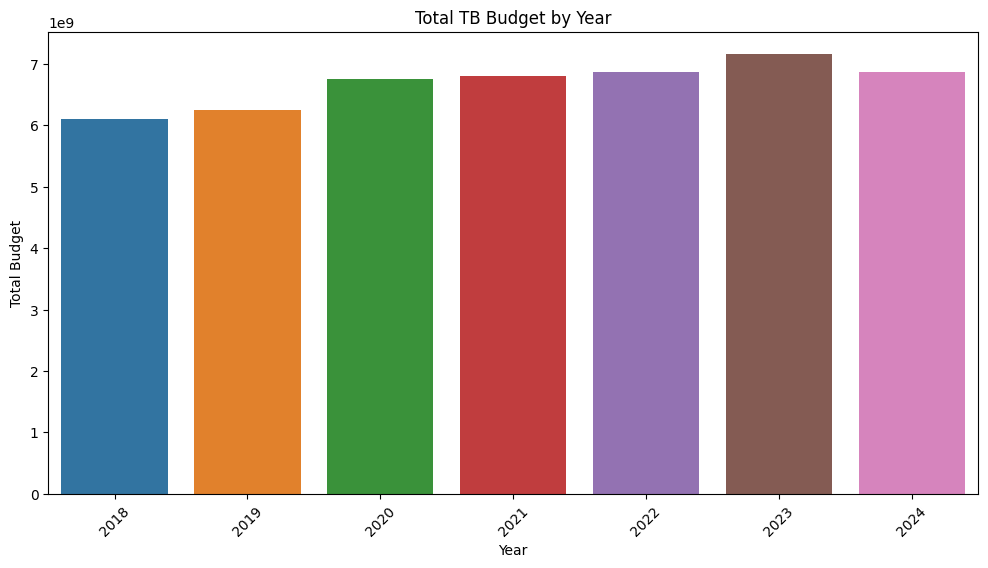

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


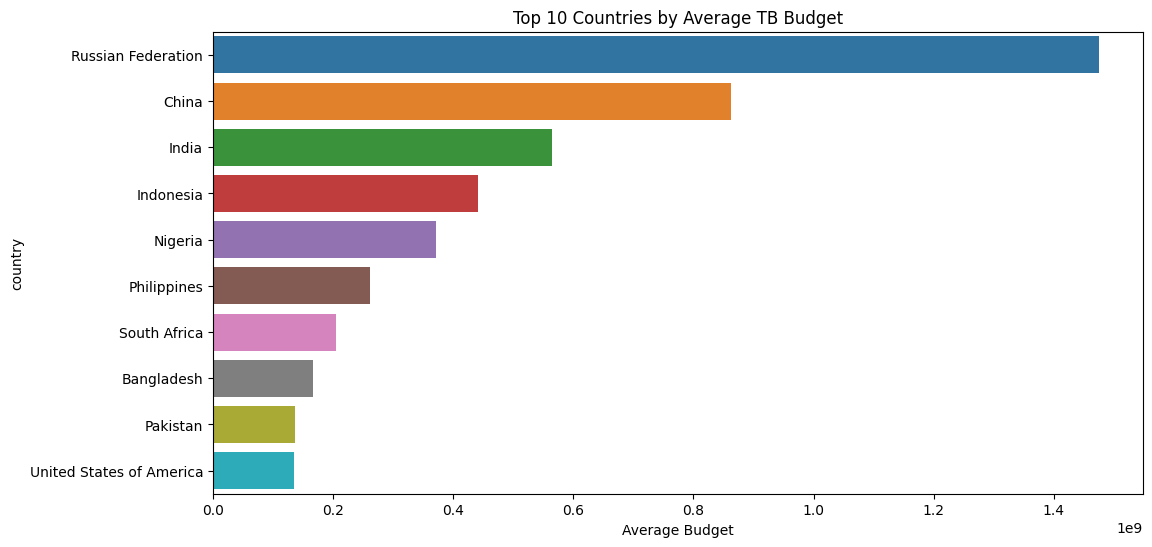

In [4]:
# First, let's look at the basic information about the budget dataset
print("Budget Dataset Info:")
print(budget.info())

# Display the first few rows and basic statistics
print("\nFirst 5 rows:")
display(budget.head())

print("\nBasic statistics:")
display(budget.describe())

# Check for missing values
print("\nMissing values:")
display(budget.isnull().sum())

# Let's create a bar plot of total budget by year
plt.figure(figsize=(12, 6))
yearly_budget = budget.groupby('year')['budget_tot'].sum()
sns.barplot(x=yearly_budget.index, y=yearly_budget.values)
plt.title('Total TB Budget by Year')
plt.xlabel('Year')
plt.ylabel('Total Budget')
plt.xticks(rotation=45)
plt.show()

# Let's also look at the top 10 countries by budget
top_10_countries = budget.groupby('country')['budget_tot'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index)
plt.title('Top 10 Countries by Average TB Budget')
plt.xlabel('Average Budget')
plt.show()

### Laboratories

In [5]:
laboratories.columns

Index(['country', 'iso2', 'iso3', 'iso_numeric', 'g_whoregion', 'year',
       'lab_sm', 'lab_sm_eqa', 'lab_sm_eqa_pass', 'lab_sm_led', 'lab_cul',
       'lab_dst', 'lab_dst_eqa', 'lab_dst_eqa_pass', 'lab_lpa', 'lab_lpa_eqa',
       'lab_xpert', 'lab_xpert_eqa', 'sldst_avail_incntry',
       'sldst_avail_outcntry', 'collab_private_lab', 'collab_public_lab',
       'nrl', 'nrl_srl_link', 'nrl_qms', 'dx_test_sites', 'smear', 'smear_eqa',
       'smear_eqa_pass', 'xpert', 'xpert_eqa', 'culture', 'culture_eqa_pass',
       'dst', 'dst_eqa_pass', 'sldst', 'sldst_eqa_pass', 'lpa', 'lpa_eqa_pass',
       'nrl_iso15189', 'xpert_etrans', 'sllpa', 'sllpa_eqa_pass',
       'infection_tests_used', 'm_wrd_tests_performed', 'm_wrd_tests_positive',
       'igra_used', 'tst_used', 'tbst_used', 'm_wrd', 'm_wrd_eqa_pass',
       'm_inh', 'm_fq', 'dst_naat_pza', 'lpa_fl', 'lpa_fl_eqa_pass', 'lpa_sl',
       'lpa_sl_eqa_pass', 'dst_rif', 'dst_rif_eqa_pass', 'dst_inh',
       'dst_inh_eqa_pass', 'dst_pza',

In [6]:
# Calculate global totals for the most recent year
recent_data = laboratories[laboratories['year'] == 2023]

global_totals = {
    recent_data['m_wrd'].sum(),
     recent_data['lab_sm_led'].sum()
}

print(global_totals)

afghanistan_data = recent_data[recent_data['country'] == 'Afghanistan']
afghanistan_totals = {
    'Total Xpert Labs': afghanistan_data['m_wrd'].iloc[0],
    'Total Xpert Sites': afghanistan_data['smear'].iloc[0]
}
print(afghanistan_totals)

{0.0, 22012.0}
{'Total Xpert Labs': 105.0, 'Total Xpert Sites': 872.0}


In [7]:
lab_columns = ['lab_xpert', 'lab_xpert_eqa', 'xpert', 'xpert_eqa', 'xpert_etrans']

/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_78115/155372400.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


(-198.0, 198.00000000000006, -98.6822565, 92.3273865)

<Figure size 1500x800 with 0 Axes>

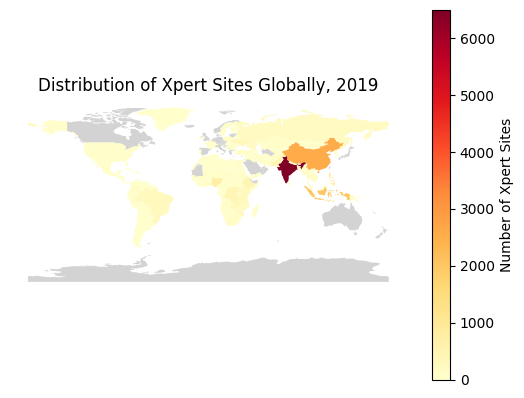

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge data with world map
world_data = world.merge(recent_data, how='left', left_on=['iso_a3'], right_on=['iso3'])

# Create the map
plt.figure(figsize=(15, 8))
world_data.plot(column='m_wrd', 
                legend=True,
                legend_kwds={'label': 'Number of Xpert Sites'},
                missing_kwds={'color': 'lightgrey'},
                cmap='YlOrRd')
plt.title('Distribution of Xpert Sites Globally, 2019')
plt.axis('off')



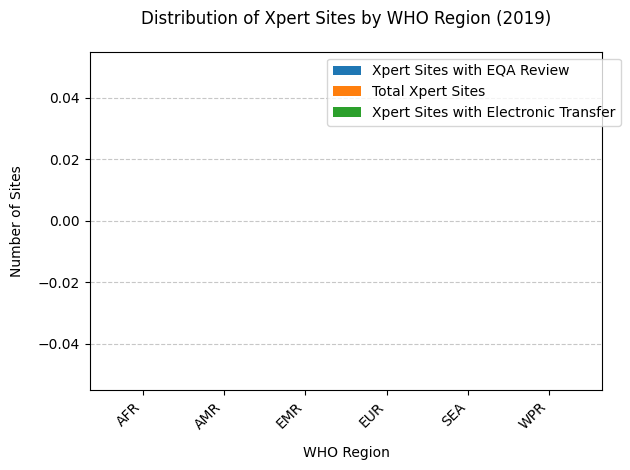

In [9]:

# Regional distribution
regional_dist = recent_data.groupby('g_whoregion').agg({
    'xpert_eqa': 'sum',
    'xpert': 'sum',
    'xpert_etrans': 'sum'
}).round(0)

#plt.figure(figsize=(12, 6))
regional_dist.plot(kind='bar', width=0.8)
plt.title('Distribution of Xpert Sites by WHO Region (2019)', pad=20)
plt.xlabel('WHO Region', labelpad=10)
plt.ylabel('Number of Sites', labelpad=10)
plt.legend(['Xpert Sites with EQA Review', 'Total Xpert Sites', 'Xpert Sites with Electronic Transfer'], 
          bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


Basic statistics for laboratory variables:


,lab_xpert,lab_xpert_eqa,xpert,xpert_eqa,xpert_etrans
count,583.000000,504.000000,822.000000,744.000000,751.000000
mean,9.349914,3.630952,45.305353,34.016129,20.448735
std,33.594321,16.081141,152.398183,132.908219,94.264096
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,0.000000,7.000000,2.000000,0.000000
75%,7.000000,1.000000,28.000000,18.000000,7.000000
max,654.000000,207.000000,2210.000000,1607.000000,1545.000000



Missing values in laboratory metrics:


lab_xpert        2639
lab_xpert_eqa    2718
xpert            2400
xpert_eqa        2478
xpert_etrans     2471
dtype: int64

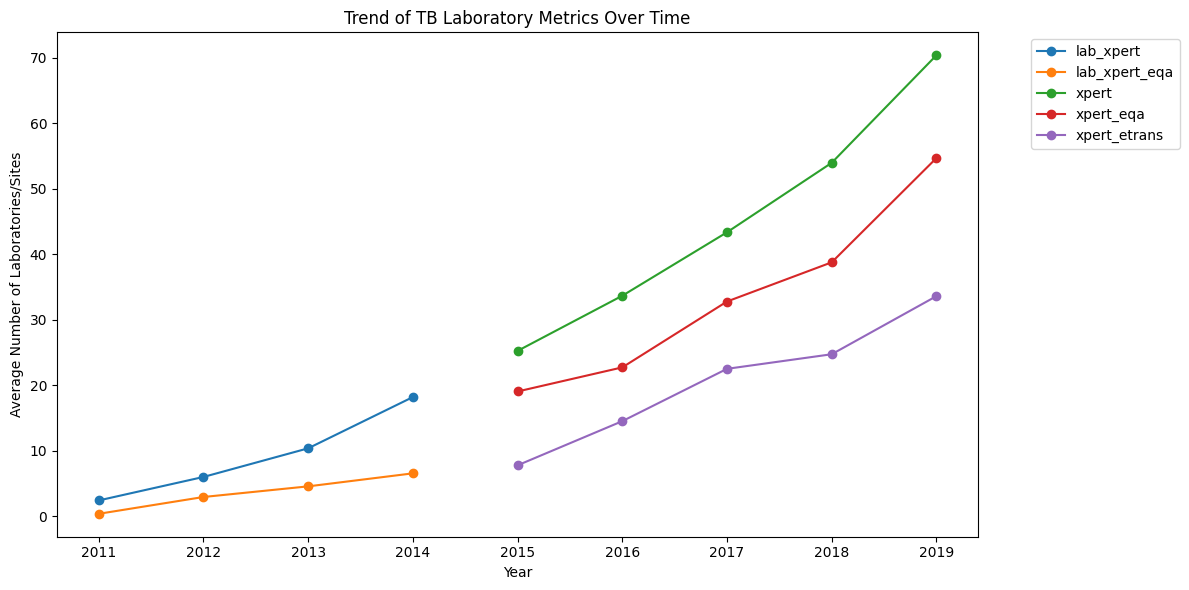

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


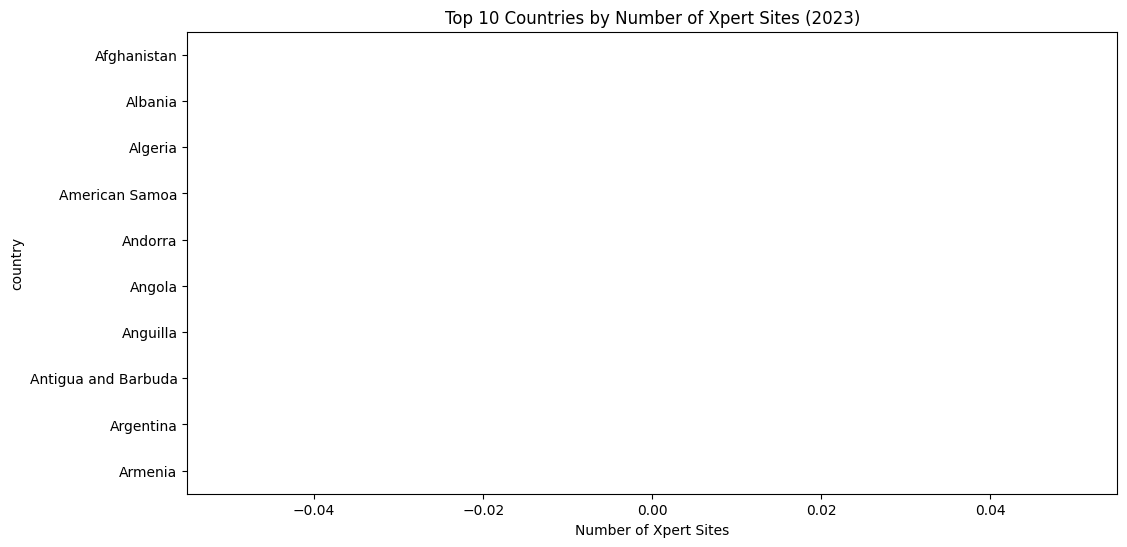

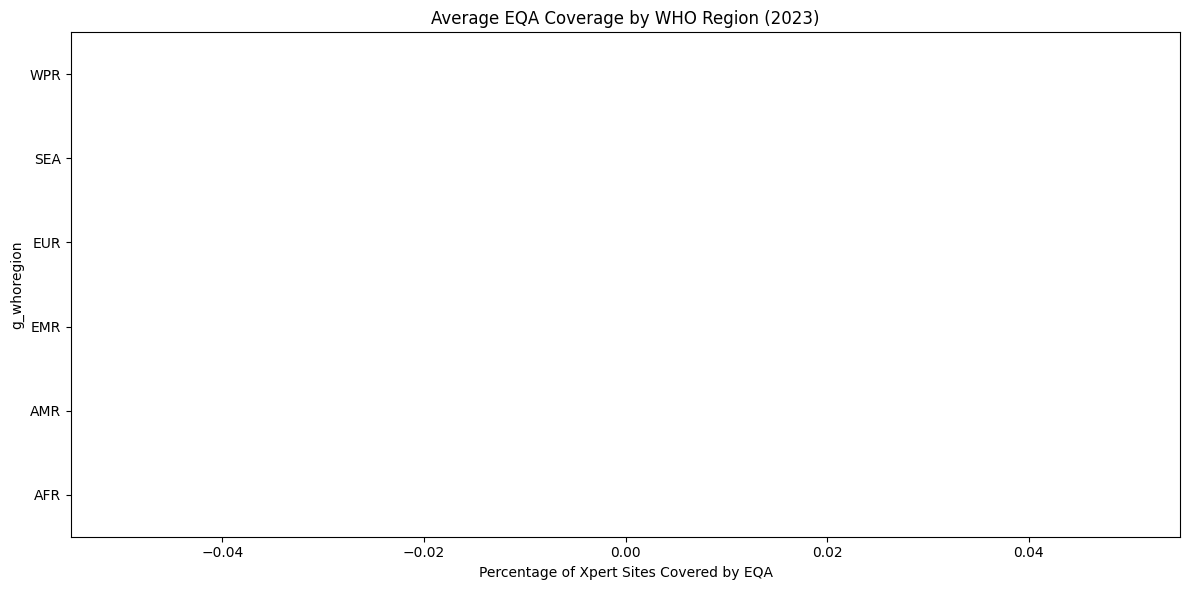

In [10]:


# First, let's see basic statistics for these variables
print("Basic statistics for laboratory variables:")
display(laboratories[lab_columns].describe())


print("\nMissing values in laboratory metrics:")
display(laboratories[lab_columns].isnull().sum())

# Let's create a time series plot to see how these metrics changed over time
plt.figure(figsize=(12, 6))
for column in lab_columns:
    yearly_mean = laboratories.groupby('year')[column].mean()
    plt.plot(yearly_mean.index, yearly_mean.values, marker='o', label=column)

plt.title('Trend of TB Laboratory Metrics Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Laboratories/Sites')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Let's look at the top 10 countries with the highest number of Xpert sites (most recent year)
most_recent_year = laboratories['year'].max()
top_xpert_countries = (laboratories[laboratories['year'] == most_recent_year]
                      .nlargest(10, 'xpert')[['country', 'xpert']])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_xpert_countries, x='xpert', y='country')
plt.title(f'Top 10 Countries by Number of Xpert Sites ({most_recent_year})')
plt.xlabel('Number of Xpert Sites')
plt.show()

# Calculate the percentage of Xpert sites covered by EQA
laboratories['eqa_coverage'] = (laboratories['xpert_eqa'] / laboratories['xpert'] * 100).round(2)

# Show average EQA coverage by WHO region for the most recent year
regional_coverage = (laboratories[laboratories['year'] == most_recent_year]
                    .groupby('g_whoregion')['eqa_coverage']
                    .mean()
                    .sort_values(ascending=True))

plt.figure(figsize=(12, 6))
regional_coverage.plot(kind='barh')
plt.title(f'Average EQA Coverage by WHO Region ({most_recent_year})')
plt.xlabel('Percentage of Xpert Sites Covered by EQA')
plt.tight_layout()
plt.show()
